# Class 09
## ML Models: Clustering

We continue working with unsupervised learning in this class. This time we are interested in separating out groups of data or creating *clusters*. This can be useful if we are looking for patterns in our data. One pattern could be that the data clumps together around certain points. However, before we can check to see if there are data clusters, we have to know how many cluster points to look for. Fortunately the **K-means Classifier** algorithm works very quickly, so we should be able to try a variety of cluster numbers fairly quickly.

### Demo

Before we dive into working with our own data, there is an [excellent visualization tool](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) that shows how this algorithm works. We will explore this together as a class before we move on to the next step.

### Sample Data

I am going to follow [a tutorial](https://www.datascience.com/blog/introduction-to-k-means-clustering-algorithm-learn-data-science-tutorials) that does a good job of describing how k-means clustering works. The data are based on measurements of truck drivers. There are two features: the mean percentage of time a driver was >5 mph over the speed limit and the mean distance driven per day.

We'll use a [scikit tool](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) to try the unsupervised clustering on the data. Naturally we'll start by loading the sample data and plotting it to see what we've got.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df1=pd.read_csv('Class09_cluster_example1.csv',index_col=0)
df1.head()


,Distance_Feature,Speeding_Feature
Driver_ID,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


Not knowing exactly what we're working with, let's get the minima and maxima of the two features. We'll use this later to create plots of our predictions.

(-1, 101)

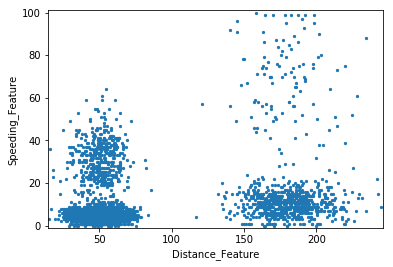

In [2]:
df1.plot.scatter(x='Distance_Feature',y='Speeding_Feature',marker='.')
x_min, x_max = df1['Distance_Feature'].min() - 1, df1['Distance_Feature'].max() + 1
y_min, y_max = df1['Speeding_Feature'].min() - 1, df1['Speeding_Feature'].max() + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

There are a couple of ways we could try splitting up this data. Like we saw in the demonstration, we have to choose the number of clusters ($k$) before we start. We'll try a couple of values and then look at them to see how they map against the data. There isn't any point in splitting the data into training/testing subsets because we don't have a label to train on. So we'll fit all the data.

In [3]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2).fit(df1)

We will make a visualization like we've done with the classification algorithms: we want to map out which regions will be predicted to be which class. That will take a bit of work.

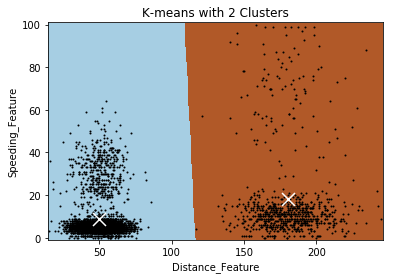

In [4]:
import numpy as np

# Step size of the mesh. Decrease to increase the quality of the plot.
h = 0.5     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Create the mesh for plotting the decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Get the centroid (or center position) of each region so we can plot that, too.
centroids = kmeans2.cluster_centers_

# First plot the mesh that has the predictions for each point on the mesh.
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# Now put the points on top
plt.plot(df1['Distance_Feature'], df1['Speeding_Feature'], 'k.', markersize=2)

# Plot the centroids as a white X
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means with 2 Clusters')

# And fix the plot limits and labels.
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.ylabel('Speeding_Feature')
plt.xlabel('Distance_Feature')


So this looks pretty good. There is a nice clear boundary between the two halves of the plot. The centroids (marked as white "X"s on the plot) look about right, too. I'm happy with this clustering. 

If we get a future point in now, we can easily classify it as belonging to one of these two groups. For example, we could now create a feature based on this grouping and then use that for other machine learning. 

## Cluster-data mismatches

Now let's see what happens if we pick 3 clusters from the start.

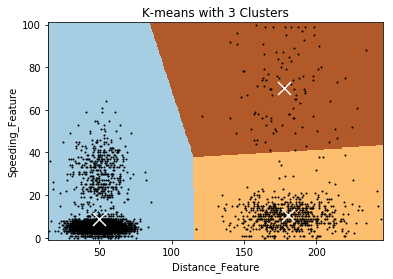

In [5]:
kmeans3 = KMeans(n_clusters=3).fit(df1)


Z = kmeans3.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
centroids = kmeans3.cluster_centers_

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(df1['Distance_Feature'], df1['Speeding_Feature'], 'k.', markersize=2)
# Plot the centroids as a white X
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means with 3 Clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.ylabel('Speeding_Feature')
plt.xlabel('Distance_Feature')

The algorithm does the best it can with what we gave it- it found three clusters of data. But the decision boundaries do not match the data very well. So let's try 4 instead.

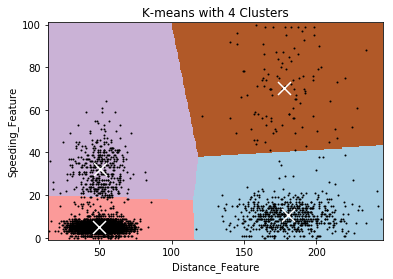

In [6]:
kmeans4 = KMeans(n_clusters=4).fit(df1)

Z = kmeans4.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
centroids = kmeans4.cluster_centers_

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(df1['Distance_Feature'], df1['Speeding_Feature'], 'k.', markersize=2)
# Plot the centroids as a white X
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means with 4 Clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.ylabel('Speeding_Feature')
plt.xlabel('Distance_Feature')

That looks better. There are at least three good groups but the algorithm picks out the upper right-hand corner as the fourth grouping. I think we can work with this.


## Using k-means groups as features

What if we want to add the groups to the dataframe to use it for other machine learning algorithms? We'll add in the feature column then plot the data using this new feature.


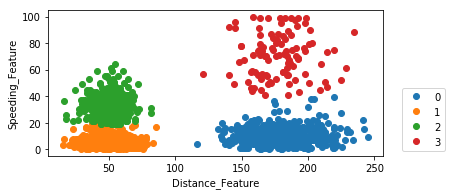

In [7]:
# Create the new column based on the labels from the kmeans fit
df1['kmeansgroup'] = kmeans4.labels_

# We group the data by this column
groups = df1.groupby('kmeansgroup')


# Then plot it
trainfig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
# The next step is to cycle through the groups (based on our categories) and plot each one on the same axis.
for name, group in groups:
    ax.plot(group['Distance_Feature'], group['Speeding_Feature'], marker='o', linestyle='', ms=6, label=name)
    ax.set_aspect(1)
ax.legend(bbox_to_anchor=(1.2,0.5))
ax.set_xlabel('Distance_Feature')
ax.set_ylabel('Speeding_Feature')

We didn't change the names of the features- the clusters are named 0-3, but that's probably good enough for now.

## Working with geographical clusters

We'll now move to working with real data. This data comes from the [US Geological Service](https://earthquake.usgs.gov/earthquakes/search/). I searched for all of the magnitude 1.0 and greater earthquakes for the state of Indiana from the last 40 years. We'll do a little data exploration on this dataset to see what we've got.

In [8]:
eqINdf = pd.read_csv('Class09_USGS_IN_data.csv',parse_dates=[0])
print(eqINdf.dtypes)
eqINdf.head()

time               datetime64[ns]
latitude                  float64
longitude                 float64
depth                     float64
mag                       float64
magType                    object
nst                       float64
gap                       float64
dmin                      float64
rms                       float64
net                        object
id                         object
updated                    object
place                      object
type                       object
horizontalError           float64
depthError                float64
magError                  float64
magNst                    float64
status                     object
locationSource             object
magSource                  object
dtype: object


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1976-01-19 06:20:39.500,36.883,-83.825,5.0,4.0,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:33.583Z,eastern Kentucky,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1,1976-04-08 06:17:57.400,37.200,-88.960,5.0,2.1,mlg,NaN,NaN,NaN,NaN,...,2016-04-14T13:08:00.840Z,"13km N of La Center, Kentucky",earthquake,NaN,NaN,NaN,NaN,reviewed,nm,nm
2,1976-04-08 16:28:17.800,37.120,-88.880,5.0,2.2,mlg,NaN,NaN,NaN,NaN,...,2016-04-14T13:08:06.920Z,"9km ENE of La Center, Kentucky",earthquake,NaN,NaN,NaN,NaN,reviewed,nm,nm
3,1976-07-23 11:38:36.300,36.910,-88.960,5.0,1.7,mlg,NaN,NaN,NaN,NaN,...,2016-04-14T13:13:23.120Z,"6km NE of Bardwell, Kentucky",earthquake,NaN,NaN,NaN,NaN,reviewed,nm,nm
4,1976-07-23 11:45:37.900,36.910,-88.960,5.0,1.4,mlg,NaN,NaN,NaN,NaN,...,2016-04-14T13:13:29.210Z,"6km NE of Bardwell, Kentucky",earthquake,NaN,NaN,NaN,NaN,reviewed,nm,nm


Let's look first at the earthquake magnitude vs time. It looks like there are a bunch of other columns we aren't going to need.


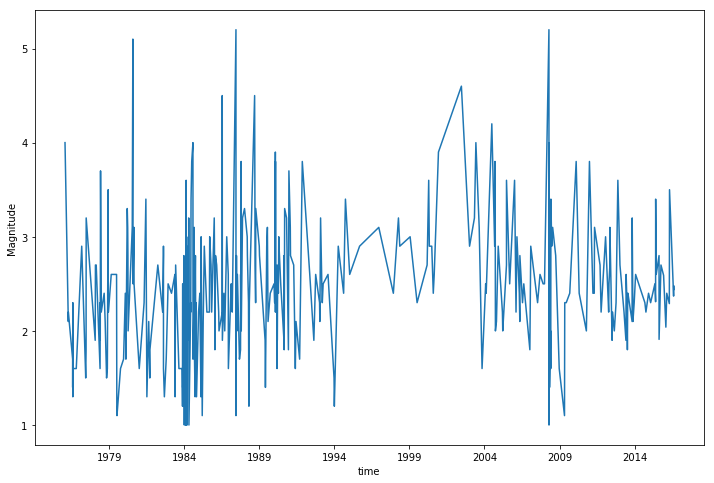

In [9]:
# I want to make the plots appear bigger. This is how to do that.
plt.rcParams['figure.figsize'] = (12,8)

plt.plot(eqINdf['time'],eqINdf['mag'])
plt.xlabel('time')
plt.ylabel('Magnitude')

That's not really what I want. What I want is the frequency of earthquakes over time. How about plotting a histogram of the number of earthquakes of each magnitude over the time window. We'll need to create a feature where we round the magnitude first. Then we can use a seaborn function to plot the different magnitudes.

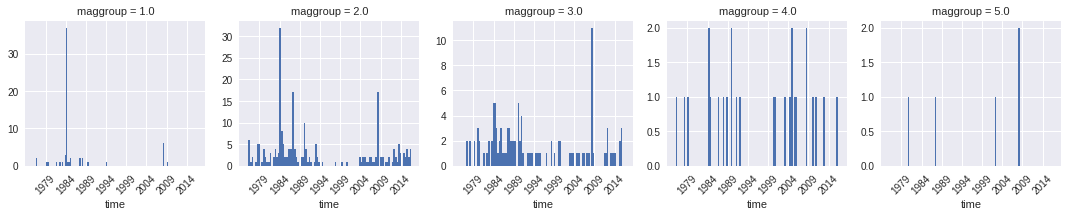

In [10]:
import seaborn as sns
eqINdf['maggroup'] = eqINdf['mag'].apply(np.round)
g= sns.FacetGrid(eqINdf, col="maggroup",sharey=False)
g = g.map(plt.hist, "time",bins=100)
g.set_xticklabels(rotation=45)

That looks more like what I want. The earthquakes look like that happen fairly regularly and mostly randomly.

Let's now look at the geographical data. I want to do a couple of things here. First, I want to plot the map so that I know where the earthquakes happen. We'll use the [Basemap library](http://matplotlib.org/basemap/) to do that part. 

I also want to plot the size of the points as proportional to the magnitude of the earthquake. The way I'm going to do this is to adjust the point size so that the `s` input to the `scatter()` function is equal to:

$size = 3^{magnitude}$.

That will make the plot look good.

Finally, I want to color the points chronologically so that, as we go through time, the colors change based on the colors of a rainbow. To do that, I'm going to need a `days since start` feature. Let's do both of those first.


In [11]:
markersize = 3**(eqINdf['mag'].values)

# Get the first date in the time series
date0 = eqINdf['time'][0]

# Subtract the first date from each date and convert it to the number of days
eqINdf['dayssincestart'] = eqINdf['time'].apply(lambda x: (x-date0).days)

colors = eqINdf['dayssincestart']

/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3289: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3298: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


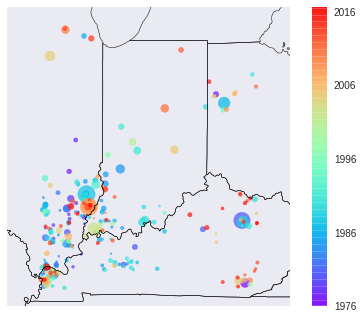

In [12]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

# Draw the map based on the maximum and minimum positions of our data points
m = Basemap(llcrnrlon=eqINdf['longitude'].min()*1.01,llcrnrlat=eqINdf['latitude'].min()*0.99,urcrnrlon=eqINdf['longitude'].max()*0.99,urcrnrlat=eqINdf['latitude'].max()*1.01,
        projection='merc')

# Add the state boundaries to the map
m.readshapefile('st99_d00', name='states', drawbounds=True)

# Prep the data for plotting on the map
x,y = m(eqINdf['longitude'].values, eqINdf['latitude'].values)


# Plot the data points on the map
m.scatter(x,y, s=markersize, c=colors, marker="o",cmap=plt.cm.rainbow,alpha=0.7)

# Now set up the color bar with ticks every 10 years
cbar = plt.colorbar(ticks=np.arange(0,colors.max(),3650))
cbar.ax.set_yticklabels(np.arange(1976,2017,10))  # vertically oriented colorbar

Now I want to try clustering the data. It looks like there may be 5-6 clusters here. We'll try one to see.

/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3452: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3289: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/projects/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3298: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


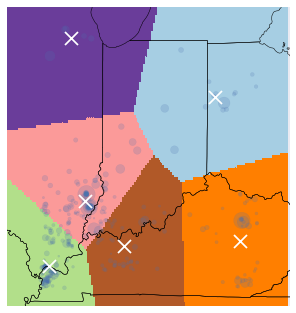

In [13]:
kmeansIN1 = KMeans(n_clusters=6,n_init=30,max_iter=1000).fit(eqINdf[['latitude','longitude']])

# Obtain labels for each point in mesh. Use last trained model.
h=0.05
xx, yy = np.meshgrid(np.arange(eqINdf['latitude'].min()*0.99, eqINdf['latitude'].max()*1.01, h), np.arange(eqINdf['longitude'].min()*1.01, eqINdf['longitude'].max()*0.99, h))

Z = kmeansIN1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
# Get the centroid of each region
centroids = kmeansIN1.cluster_centers_

# Draw the map based on the maximum and minimum positions of our data points
m = Basemap(llcrnrlon=eqINdf['longitude'].min()*1.01,llcrnrlat=eqINdf['latitude'].min()*0.99,urcrnrlon=eqINdf['longitude'].max()*0.99,urcrnrlat=eqINdf['latitude'].max()*1.01,
        projection='merc')

# Add the state boundaries to the map
m.readshapefile('st99_d00', name='states', drawbounds=True)

# Prep our cluster boundaries for plotting on the map
xb,yb = m(yy,xx)

# Plot the boundaries
m.pcolor(xb,yb,Z,cmap=plt.cm.Paired)

# Plot the points - all the same color, but still sizing them by magnitude
m.scatter(x,y, s=markersize, marker="o",alpha=0.2)

# Plot the centroids as a white X
xc,yc = m(centroids[:, 1], centroids[:, 0])
m.scatter(xc,yc,marker='x', s=169, linewidths=3,color='w', zorder=10)

That looks about right - the white X marks may correspond to the central locations of the faults. That is something to look into.

### In-class Activity

I've got another USGS dataset. This time it maps the state of Oklahoma during the same time period. Take a look at the data to see what we've got (`Class09_USGS_OK_data.csv`).

### Homework

Take a look at your own data and see if there are clusters you could identify. If not, pick out a different dataset (like a crime map or traffic map) and do cluster analysis on it. The homework will be due next Tuesday.